#Consumer Complaints

In [ ]:
#Calculate and chart:

# Number of complaints by month (leave off the current month)

# Number of complaints by product

# Number of complaints by company (top 10 companies only)

# Number of complaints by company response

# Mean number of complaints by day of week

# Any other insights you find interesting

# Write up a summary of what you found from each chart you made.

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
%matplotlib inline

In [194]:
complaints = pd.read_csv("Consumer_Complaints.csv", dtype=object)

In [195]:
date_received = complaints[["Date received"]]

In [196]:
complaints["Date recevied"] = pd.to_datetime(complaints["Date received"])

In [197]:
complaints.index = pd.to_datetime(complaints["Date received"])

In [134]:
complaints.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 409400 entries, 2015-06-22 to 2011-12-01
Data columns (total 15 columns):
Complaint ID            409400 non-null object
Product                 409400 non-null object
Sub-product             280534 non-null object
Issue                   409394 non-null object
Sub-issue               128913 non-null object
State                   403759 non-null object
ZIP code                404783 non-null object
Submitted via           409400 non-null object
Date received           409400 non-null object
Date sent to company    409400 non-null object
Company                 409400 non-null object
Company response        409400 non-null object
Timely response?        409400 non-null object
Consumer disputed?      377841 non-null object
Date recevied           409400 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(14)
memory usage: 50.0+ MB


#Number of Complaints by Month

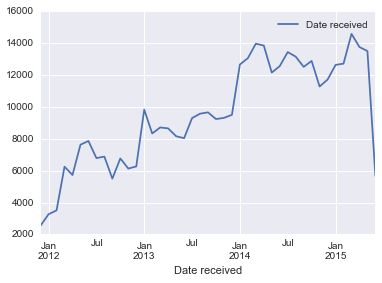

In [167]:
complaints[['Date received']].resample('M', how= "count").plot()

#Number of Complaints by Product

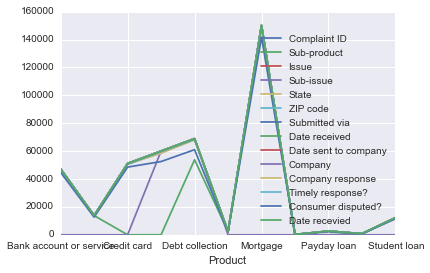

In [211]:
complaints_product = complaints.groupby("Product").count().plot()

In [210]:
complaints_product

,Complaint ID,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?,Date recevied
Product,,,,,,,,,,,,,,
Bank account or service,47166,47166,47162,0,46230,46305,47166,47166,47166,47166,47166,47166,44730,47166
Consumer loan,13771,13771,13769,0,13632,13609,13771,13771,13771,13771,13771,13771,12666,13771
Credit card,51103,0,51103,0,50548,50473,51103,51103,51103,51103,51103,51103,48529,51103
Credit reporting,60006,0,60006,60006,58475,59568,60006,60006,60006,60006,60006,60006,52516,60006
Debt collection,68907,53805,68907,68907,68065,68246,68907,68907,68907,68907,68907,68907,61004,68907
Money transfers,2383,2383,2383,0,2281,2323,2383,2383,2383,2383,2383,2383,2110,2383
Mortgage,150140,150140,150140,0,148819,148477,150140,150140,150140,150140,150140,150140,141705,150140
Other financial service,227,227,227,0,216,223,227,227,227,227,227,227,183,227
Payday loan,2655,0,2655,0,2590,2633,2655,2655,2655,2655,2655,2655,2276,2655
